In [15]:
import numpy as np
import pandas as pd
import hoi
from hoi.plot import plot_landscape
from hoi.utils import get_nbest_mult
import matplotlib.pyplot as plt
import xgi


In [3]:
data=pd.read_csv("sumscoredata.csv", sep=";")

In [4]:
data.head()

,family support,competition,appearance,God's love,accademic competence,virtue,other's approval
0,28,16,18,12,27,33,20
1,28,21,18,27,26,23,24
2,29,22,21,10,26,29,22
3,24,26,30,5,29,31,17
4,32,30,16,10,27,27,26


In [5]:
data_array=np.array(np.array(data)).astype(float)

In [6]:
model=hoi.metrics.InfoTopo(data_array)
oinfo=model.fit(minsize=2,maxsize=5)

Compute entropy with gcmi
    Copnorm data
Get list of multiplets


  0%|          |  0/5 [00:00<?,       ?it/s]

Get list of multiplets


  0%|          |  0/112 [00:00<?,       ?it/s]

<Axes: xlabel='Order', ylabel='Topological Information [Bits]'>

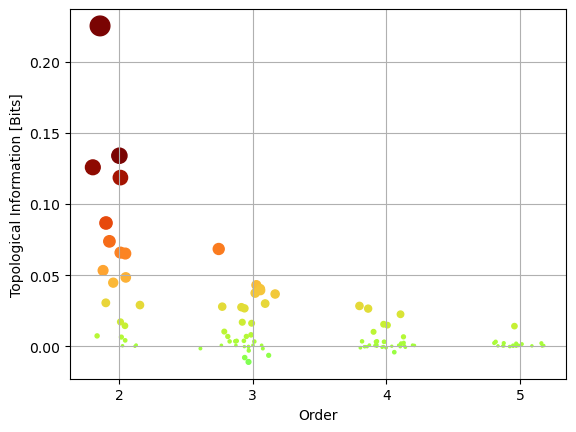

In [7]:
plot_landscape(
    oinfo,
    model,
    kind="scatter",
    undersampling=False,
    plt_kwargs=dict(cmap="turbo"),
)

In [8]:
df=get_nbest_mult(oinfo, model, minsize=3, maxsize=3)

In [9]:
df

,index,order,hoi,multiplet
0,37,3,0.068445,"[1, 2, 4]"
1,23,3,0.043066,"[0, 1, 4]"
2,27,3,0.040406,"[0, 2, 4]"
3,50,3,0.039305,"[2, 4, 6]"
4,34,3,0.037454,"[0, 4, 6]"
5,26,3,-0.001573,"[0, 2, 3]"
6,51,3,-0.002990,"[2, 5, 6]"
7,38,3,-0.006330,"[1, 2, 5]"
8,28,3,-0.007914,"[0, 2, 5]"
9,49,3,-0.010963,"[2, 4, 5]"


Redundancy hypergraph at order 3

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x1a3f3d2f090>,
  <matplotlib.collections.PatchCollection at 0x1a3f57efc90>))

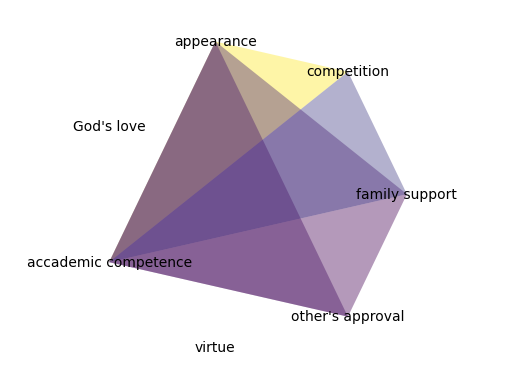

In [16]:
hype=xgi.Hypergraph()

#Here we separate the synergistic and redundant interactions
index_pos=np.where(df['hoi']>0)[0]
index_neg=np.where(df['hoi']<0)[0]
hype.add_nodes_from(np.arange(0,7))
hype.add_edges_from(df['multiplet'][index_pos][::-1])

dict_node_labels={}
for i,l in enumerate(data.columns):
    dict_node_labels[i]=l

xgi.draw(hype, pos=xgi.drawing.layout.circular_layout(hype), node_labels=dict_node_labels, edge_fc=df['hoi'][index_pos][::-1], node_size=0, edge_fc_cmap='viridis')

Synergy hypergraph at order 3

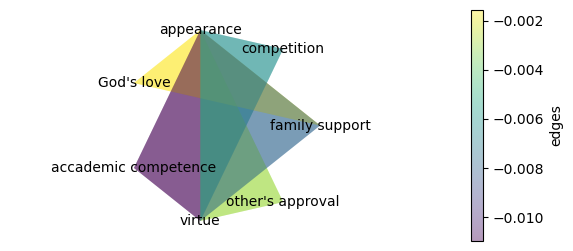

In [51]:
hype=xgi.Hypergraph()

#Here we separate the synergistic and redundant interactions
index_pos=np.where(df['hoi']>0)[0]
index_neg=np.where(df['hoi']<0)[0]
hype.add_nodes_from(np.arange(0,7))
hype.add_edges_from(df['multiplet'][index_neg][::-1])

dict_node_labels={}
for i,l in enumerate(data.columns):
    dict_node_labels[i]=l

plt.figure(figsize=(7,3))
ax, hyperedge_collection = xgi.draw_hyperedges(hype, 
                                  pos=xgi.drawing.layout.circular_layout(hype), 
                                  edge_fc=df['hoi'][index_neg][::-1], 
                                  node_size=0, 
                                  edge_fc_cmap='viridis')
xgi.draw(hype, 
         pos=xgi.drawing.layout.circular_layout(hype), 
         edge_fc=df['hoi'][index_neg][::-1], 
         node_labels=dict_node_labels,
         node_size=0,
         edge_fc_cmap='viridis')

plt.colorbar(hyperedge_collection[1], label="edges", ax=ax)